<a href="https://colab.research.google.com/github/mgersins-design/Machine-Learning/blob/main/HW6/FCNN_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [242]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/diabetes.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [243]:
n_samples = df.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([432, 528, 613, 200, 555, 544, 646,  65, 704, 314,  35, 465, 718, 193,
         543, 277, 525, 300, 138,  31, 607, 468, 112, 308, 252, 553, 119, 681,
          40, 598, 701, 500, 702, 247, 550, 653, 754, 433, 663, 762,  50,  60,
         150, 710,  39,  59, 301, 223, 538, 295, 504, 214,  81, 126, 151, 686,
         722, 564, 586, 612, 617, 135, 226,   6, 278, 546, 588,  74, 721, 284,
         168, 406,  23, 743,  37, 287, 467, 625, 529, 342, 443,  79, 438, 180,
         676, 115, 326, 256, 746,  91, 576, 748,  43, 507, 124, 419, 182, 694,
         220,   8, 430, 103, 229, 461, 615, 618, 547, 759, 120, 541, 685, 590,
         311, 227, 134, 478, 360, 536, 349,  56, 291, 367, 298, 654, 383, 337,
         222, 106, 181, 700, 519, 357, 238, 596,  70, 584, 429, 208, 210, 299,
          29, 516, 634, 427, 412, 767,  93, 561, 764, 639, 294, 604, 482, 260,
         662,  26, 614,  57, 396,  61, 292, 281, 274,  62, 761, 317, 737,  18,
         569, 348, 696, 455,  73,  51, 733, 606, 288

In [244]:
# Splitting the data in train and validation set
train_df = df.iloc[train_indices.numpy()]
val_df = df.iloc[val_indices.numpy()]

# Splitting the train and val data in input and outputs
y_train = train_df[['Outcome']]
x_train = train_df.drop('Outcome', axis = 1)

y_test = val_df[['Outcome']]
x_test = val_df.drop('Outcome', axis = 1)

In [245]:
# converting data in pytorch tensors
x_train = torch.tensor(x_train.values, dtype = torch.float32)
y_train = torch.tensor(y_train.values, dtype = torch.float32)
x_test = torch.tensor(x_test.values, dtype = torch.float32)
y_test = torch.tensor(y_test.values, dtype = torch.float32)

# normalizing the inputs
mean = x_train.mean(dim = 0)
std = x_train.std(dim = 0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [246]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_t_u, val_t_u,
                  train_t_c, val_t_c):

    print("Training is starting...")
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = model(val_t_u)
        val_loss = loss_fn(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        if epoch <= 3 or epoch % 50 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    print('Training is done.')

    return train_losses, val_losses

In [247]:
import torch.nn as nn
fcnn = nn.Sequential(
       nn.Linear(8, 32),
       nn.ReLU(),
       nn.Linear(32, 16),
       nn.ReLU(),
       nn.Linear(16, 1)
)
fcnn

Sequential(
  (0): Linear(in_features=8, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)

In [248]:
optimizer = torch.optim.Adam(fcnn.parameters(), lr = 0.001)
loss_fn = nn.BCEWithLogitsLoss()

train_history, val_history = training_loop(
    n_epochs = 200,
    optimizer = optimizer,
    model = fcnn,
    loss_fn = loss_fn,
    train_t_u = x_train,
    val_t_u = x_test,
    train_t_c = y_train,
    val_t_c = y_test
)

Training is starting...
Epoch 1, Training loss 0.6988, Validation loss 0.7034
Epoch 2, Training loss 0.6962, Validation loss 0.7000
Epoch 3, Training loss 0.6935, Validation loss 0.6967
Epoch 50, Training loss 0.5731, Validation loss 0.5527
Epoch 100, Training loss 0.4709, Validation loss 0.4360
Epoch 150, Training loss 0.4465, Validation loss 0.4207
Epoch 200, Training loss 0.4306, Validation loss 0.4254
Training is done.


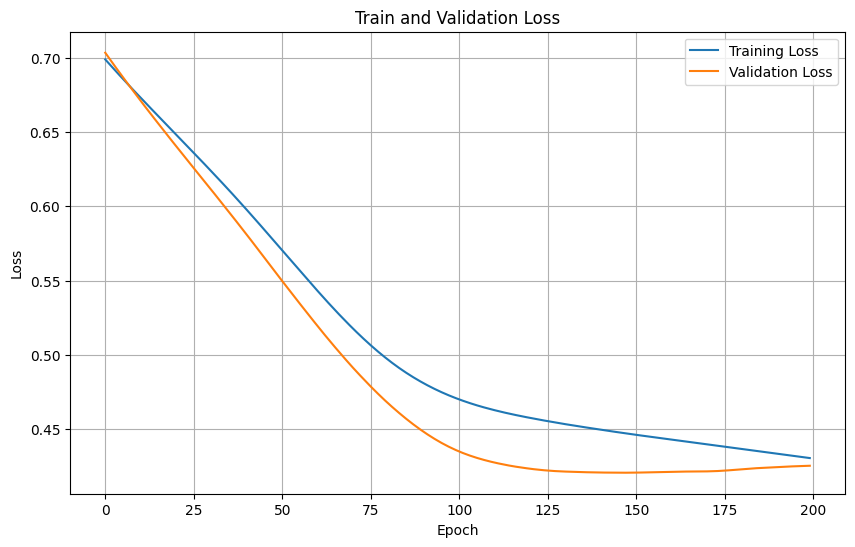

In [249]:
plt.figure(figsize=(10, 6))
plt.plot(train_history, label='Training Loss')
plt.plot(val_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.grid(True)

In [252]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fcnn.eval()

with torch.no_grad():
    y_pred_logits = fcnn(x_test)
    y_pred_prob = torch.sigmoid(y_pred_logits)
    y_pred_class = (y_pred_prob > 0.5).float()

y_test_np = y_test.numpy()
y_pred_class_np = y_pred_class.detach().numpy()

acc = accuracy_score(y_test_np, y_pred_class_np)
pre = precision_score(y_test_np, y_pred_class_np)
rec = recall_score(y_test_np, y_pred_class_np)
f1 = f1_score(y_test_np, y_pred_class_np)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(confusion_matrix(y_test_np, y_pred_class_np))

Accuracy:  0.7843
Precision: 0.5882
Recall:    0.7143
F1-Score:  0.6452
[[90 21]
 [12 30]]
